# pdfからテーブルを抽出する
<iframe width="560" height="315" src="https://www.youtube.com/embed/iuBG4s-xbOo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## camelotを使う場合
### 必要なライブラリをインストール
今回はCamelotというライブラリを使ってpdfからテーブルを抽出します。
`opencv-contrib-python`、`camelot`、`tabula-py`が必要なので適宜インストールします。

```
poetry add opencv-contrib-python camelot tabula-py ghostscript
```

Ghostscriptというソフトウェアも必要なのでインストールします。
OSによってインストール方法が異なるので注意してください。
インストール方法は[こちら](https://camelot-py.readthedocs.io/en/master/user/install-deps.html)を参照してください。

### ghostscriptがインストールされているか確認する

In [1]:
from ctypes.util import find_library

find_library("gs")  # gsが実行可能ならば /usr/local/lib/libgs.dylibなどの表示がされます

'/usr/local/lib/libgs.dylib'

### pdfからテーブルを抽出する
例として[総務省のページで公開されている「政策ごとの予算との対応について」のpdf](https://www.soumu.go.jp/menu_yosan/yosan.html#r4)からテーブルを抽出します。テーブルがパースできたことがわかります。

※jupyterbookでエラーが出る場合があるためコメントアウトしています

In [2]:
import camelot

# pdfを読み込んでテーブルを抽出
# pdf_name = "000788423.pdf"
# tables = camelot.read_pdf(pdf_name)
# print("パースできたテーブル数", tables.n)

# 先頭５行のみ表示
# tables[0].df.head()

今度はFLEX LNGという会社の決算情報をパースしてみます。
データは[FLEXLNG｜Investor Home](https://www.flexlng.com/investor-home/)で取得したファイルで実行しています。
今後はテーブルのパースに失敗してしましました。

In [3]:
# pdfを読み込んでテーブルを抽出
pdf_name = "flex-lng-earnings-release-q3-2021.pdf"
tables = camelot.read_pdf(pdf_name)
print("パースできたテーブル数", tables.n)
# 先頭５行のみ表示
# tables[0].df.head()

パースできたテーブル数 0


## tabula-py を使う場合
`poetry add tabula-py`などとしてtabulaをインストールしてください。
tabulaはバックグラウンドで[tabula-java
](https://github.com/tabulapdf/tabula-java)を使用していますが、Javaのバージョンが古い場合こちらがエラーになる場合があるようです。

参考文献：[subprocess.CalledProcessError While extracting table from PDF using tabula-py](https://github.com/chezou/tabula-py/issues/206)

In [4]:
from tabula import read_pdf

tables = read_pdf("flex-lng-earnings-release-q3-2021.pdf", pages="all")
data = tables[1]
data.head()

,ASSETS,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Current assets,NaN,NaN,NaN,NaN
1,Cash and cash equivalents,4,"138,116","144,151","128,878"
2,Restricted cash,4,47,56,84
3,Inventory,NaN,"5,915","4,075","3,656"
4,Other current assets,5,"12,503","8,886","25,061"


### パースしたテーブルを可視化する
tabulateでパースしたテーブルは文字列になっているので、そこから数値を読み取ります。

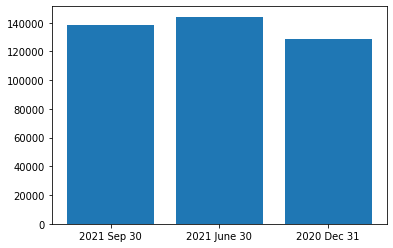

In [5]:
import matplotlib.pyplot as plt

d = data.query("ASSETS=='Cash and cash equivalents'").iloc[0][2:]

# パースしたテーブルは文字列になっているので数値に変換する
d = [int(v.replace(",", "")) for v in d]

# プロット
plt.bar([0, 1, 2], d)
plt.xticks([0, 1, 2], ["2021 Sep 30", "2021 June 30", "2020 Dec 31"])
plt.show()